**RASPAGEM DE DADOS - BRASILEIRÃO 2023**
<br>Por: Leandro Dias Vieira
<br>
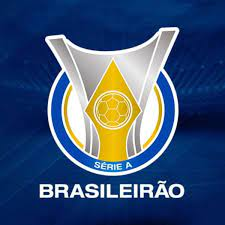

- Instalando bibliotecas

In [63]:
!pip install Beautifulsoup4

In [64]:
!pip install requests

- Importando Bibliotecas

In [65]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

- Pegando o Link

In [66]:
url = "https://www.espn.com.br/futebol/classificacao/_/liga/bra.1"

- Passando parametros para acessar site

In [67]:
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"}

- Testando requisicao

In [68]:
requisicao = requests.get(url, headers = headers)

In [69]:
print(requisicao)

<Response [200]>


In [70]:
## print(requisicao.text)

- Parseando o site

In [71]:
site = BeautifulSoup(requisicao.text, "html.parser")

- Função Prettify(), para arrumar HTML e Concatenar

In [72]:
site2 = site.prettify()

In [73]:
## print(site2)

# Importando a primeira tabela

- Encontrando a tag da primeira tabela

In [74]:
tabela = site.find("table")

In [75]:
print(tabela)

<table class="Table Table--align-right Table--fixed Table--fixed-left" style="border-collapse:collapse;border-spacing:0"><colgroup class="Table__Colgroup"><col class="Table__Column"/></colgroup><thead class="Table__header-group Table__THEAD"><tr class="Table__sub-header Table__TR Table__even"><th class="subHeader__item--content Table__TH" title=""><span class="fw-medium w-100 dib subHeader__item--content" title="2023">2023</span></th></tr></thead><tbody class="Table__TBODY"><tr class="Table__TR Table__TR--sm Table__even" data-idx="0"><td class="Table__TD"><div class="team-link flex items-center clr-gray-03"><span class="team-position ml2 pr3">1</span><span class="pr4 TeamLink__Logo"><a class="AnchorLink" data-clubhouse-uid="s:600~t:2029" href="/futebol/time/_/id/2029/palmeiras" tabindex="0"></a></span><span class="dn show-mobile"><a class="AnchorLink" data-clubhouse-uid="s:600~t:2029" href="/futebol/time/_/id/2029/palmeiras" tabindex="0"><abbr data-clubhouse-uid="s:600~t:2029" style="t

- Criando DataFrame

In [76]:
df = pd.DataFrame(columns=["Time"])

In [77]:
df

,Time


- Fazendo a Inserção das Linhas

In [78]:
for linha in tabela.tbody.find_all("tr"):
  for coluna in linha.find_all("td"):
    for div in coluna.find_all("div"):
      span = div.find("span", class_ ="hide-mobile")
      nometime = span.find_all("a")
    if (nometime != []):
      time = nometime[0].text.strip(" ")
      df = pd.concat([df, pd.DataFrame.from_records([{"Time": time}])])


In [79]:
df

,Time
0,Palmeiras
0,Grêmio
0,Atlético-MG
0,Flamengo
0,Botafogo
0,Red Bull Bragantino
0,Fluminense
0,Athletico-PR
0,Internacional
0,Fortaleza


# Importando a segunda tabela

- Encontrando a tag da segunda tabela

In [80]:
tabela2 = site.find("table", class_="Table Table--align-right")

In [81]:
print(tabela2)

<table class="Table Table--align-right" style="border-collapse:collapse;border-spacing:0"><colgroup class="Table__Colgroup"><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/><col class="Table__Column"/></colgroup><thead class="Table__header-group Table__THEAD"><tr class="Table__sub-header Table__TR Table__even"><th class="tar subHeader__item--content Table__TH" title=""><span class="fw-medium w-100 dib tar subHeader__item--content underline" title="Jogos"><a class="AnchorLink" href="/futebol/classificacao/_/liga/BRA.1/ordenar/gamesplayed/dir/desce" tabindex="0">J</a></span></th><th class="tar subHeader__item--content Table__TH" title=""><span class="fw-medium w-100 dib tar subHeader__item--content underline" title="Vitórias"><a class="AnchorLink" href="/futebol/classificacao/_/liga/BRA.1/ordenar/wins/dir/desce" tabindex="0">V</a></span></th><

- Criando outro DF para armazenar resultado

In [82]:
df2 = pd.DataFrame(columns=["Jogos", "Vitórias","Empates", "Derrotas",  "Gols Pró", "Gols Contra", "Saldo de Gols", "Pontos"])

- Fazendo a inserção das linhas

In [83]:
for linha in tabela2.tbody.find_all("tr"):
  coluna = linha.find_all("td")
  if (coluna != []):
    jogos = coluna[0].text.strip(' ')
    vitorias = coluna[1].text.strip(' ')
    empates = coluna[2].text.strip(" ")
    derrotas = coluna[3].text.strip(" ")
    gols_pro = coluna[4].text.strip(" ")
    gols_contra = coluna[5].text.strip(" ")
    saldo_de_gols = coluna[6].text.strip(" ")
    pontos = coluna[7].text.strip(" ")
    df2 = pd.concat([df2, pd.DataFrame.from_records([{"Jogos": jogos ,"Vitórias": vitorias, "Empates": empates, "Derrotas": derrotas, "Gols Pró": gols_pro, "Gols Contra": gols_contra, "Saldo de Gols": saldo_de_gols, "Pontos": pontos}])])

In [84]:
df2

,Jogos,Vitórias,Empates,Derrotas,Gols Pró,Gols Contra,Saldo de Gols,Pontos
0,38,20,10,8,64,33,+31,70
0,38,21,5,12,63,56,+7,68
0,38,19,9,10,52,32,+20,66
0,38,19,9,10,56,42,+14,66
0,38,18,10,10,58,37,+21,64
0,38,17,11,10,49,35,+14,62
0,38,16,8,14,51,47,+4,56
0,38,14,14,10,51,43,+8,56
0,38,15,10,13,46,45,+1,55
0,38,15,9,14,45,44,+1,54


# Concatenando as tabelas

In [85]:
tabela_final = pd.concat([df,df2], axis=1)
tabela_final

,Time,Jogos,Vitórias,Empates,Derrotas,Gols Pró,Gols Contra,Saldo de Gols,Pontos
0,Palmeiras,38,20,10,8,64,33,+31,70
0,Grêmio,38,21,5,12,63,56,+7,68
0,Atlético-MG,38,19,9,10,52,32,+20,66
0,Flamengo,38,19,9,10,56,42,+14,66
0,Botafogo,38,18,10,10,58,37,+21,64
0,Red Bull Bragantino,38,17,11,10,49,35,+14,62
0,Fluminense,38,16,8,14,51,47,+4,56
0,Athletico-PR,38,14,14,10,51,43,+8,56
0,Internacional,38,15,10,13,46,45,+1,55
0,Fortaleza,38,15,9,14,45,44,+1,54


# Arrumando indices

- Começando por 1, e nao por 0

In [86]:
tabela_final.index = np.arange(1, len(tabela_final)+1)

In [87]:
tabela_final

,Time,Jogos,Vitórias,Empates,Derrotas,Gols Pró,Gols Contra,Saldo de Gols,Pontos
1,Palmeiras,38,20,10,8,64,33,+31,70
2,Grêmio,38,21,5,12,63,56,+7,68
3,Atlético-MG,38,19,9,10,52,32,+20,66
4,Flamengo,38,19,9,10,56,42,+14,66
5,Botafogo,38,18,10,10,58,37,+21,64
6,Red Bull Bragantino,38,17,11,10,49,35,+14,62
7,Fluminense,38,16,8,14,51,47,+4,56
8,Athletico-PR,38,14,14,10,51,43,+8,56
9,Internacional,38,15,10,13,46,45,+1,55
10,Fortaleza,38,15,9,14,45,44,+1,54


# Ajustando Tipagem dos Dados

In [88]:
tabela_final["Jogos"] = pd.to_numeric(tabela_final["Jogos"])
tabela_final["Vitórias"] = pd.to_numeric(tabela_final["Vitórias"])
tabela_final["Empates"] = pd.to_numeric(tabela_final["Empates"])
tabela_final["Derrotas"] = pd.to_numeric(tabela_final["Derrotas"])
tabela_final["Gols Pró"] = pd.to_numeric(tabela_final["Gols Pró"])
tabela_final["Gols Contra"] = pd.to_numeric(tabela_final["Gols Contra"])
tabela_final["Saldo de Gols"] = pd.to_numeric(tabela_final["Saldo de Gols"])
tabela_final["Pontos"] = pd.to_numeric(tabela_final["Pontos"])
tabela_final.dtypes

Time             object
Jogos             int64
Vitórias          int64
Empates           int64
Derrotas          int64
Gols Pró          int64
Gols Contra       int64
Saldo de Gols     int64
Pontos            int64
dtype: object

# Top 5

- Top 5 times com menos vitórias

In [89]:
tabela_final.sort_values(by="Vitórias", ascending= True).head(5)

,Time,Jogos,Vitórias,Empates,Derrotas,Gols Pró,Gols Contra,Saldo de Gols,Pontos
20,América-MG,38,5,9,24,42,81,-39,24
19,Coritiba,38,8,6,24,41,73,-32,30
18,Goiás,38,9,11,18,36,53,-17,38
17,Santos,38,11,10,17,39,64,-25,43
14,Cruzeiro,38,11,14,13,35,32,3,47


- Top 5 times com mais empates

In [90]:
tabela_final.sort_values(by="Empates", ascending= False).head(5)

,Time,Jogos,Vitórias,Empates,Derrotas,Gols Pró,Gols Contra,Saldo de Gols,Pontos
14,Cruzeiro,38,11,14,13,35,32,3,47
13,Corinthians,38,12,14,12,47,48,-1,50
8,Athletico-PR,38,14,14,10,51,43,8,56
11,São Paulo,38,14,11,13,40,38,2,53
18,Goiás,38,9,11,18,36,53,-17,38


- Top 5 times que mais fizeram gols

In [91]:
tabela_final.sort_values(by="Gols Pró", ascending= False).head(5)

,Time,Jogos,Vitórias,Empates,Derrotas,Gols Pró,Gols Contra,Saldo de Gols,Pontos
1,Palmeiras,38,20,10,8,64,33,31,70
2,Grêmio,38,21,5,12,63,56,7,68
5,Botafogo,38,18,10,10,58,37,21,64
4,Flamengo,38,19,9,10,56,42,14,66
3,Atlético-MG,38,19,9,10,52,32,20,66


- Top 5 times com mais saldo de gols

In [92]:
tabela_final.sort_values(by="Saldo de Gols", ascending= False).head(5)

,Time,Jogos,Vitórias,Empates,Derrotas,Gols Pró,Gols Contra,Saldo de Gols,Pontos
1,Palmeiras,38,20,10,8,64,33,31,70
5,Botafogo,38,18,10,10,58,37,21,64
3,Atlético-MG,38,19,9,10,52,32,20,66
4,Flamengo,38,19,9,10,56,42,14,66
6,Red Bull Bragantino,38,17,11,10,49,35,14,62
